In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
# Load data
customers = pd.read_csv('Dataset/Customers.csv')
products = pd.read_csv('Dataset/Products.csv')
transactions = pd.read_csv('Dataset/Transactions.csv')

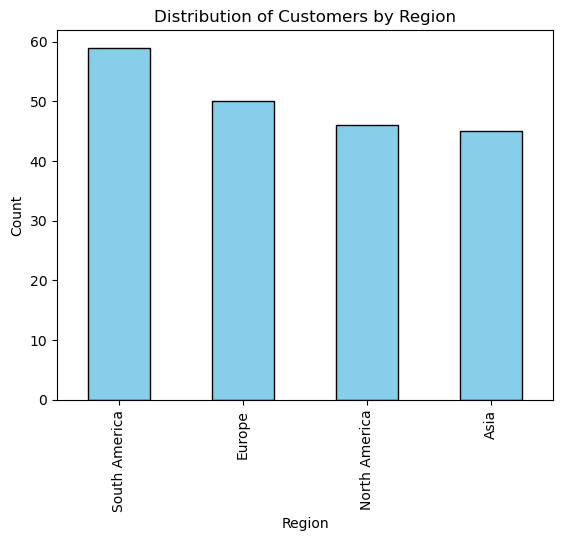

In [4]:
customers['Region'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

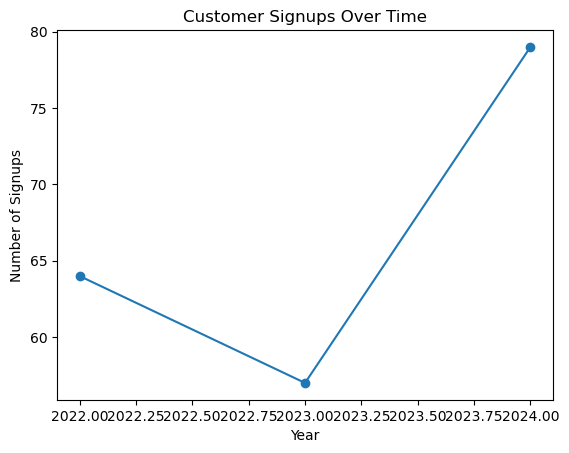

In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
customers['SignupYear'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Customer Signups Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

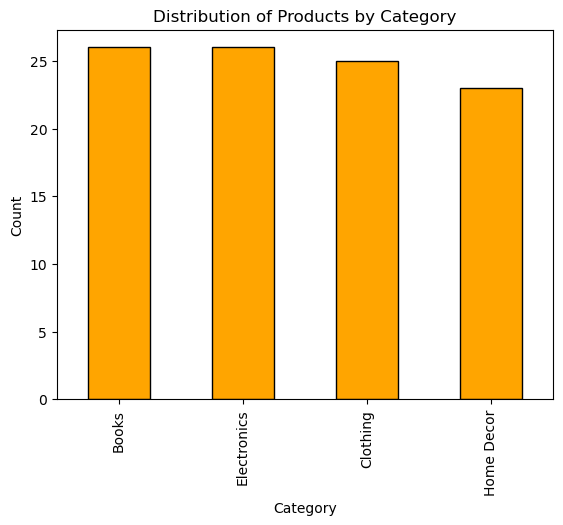

In [8]:
products['Category'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

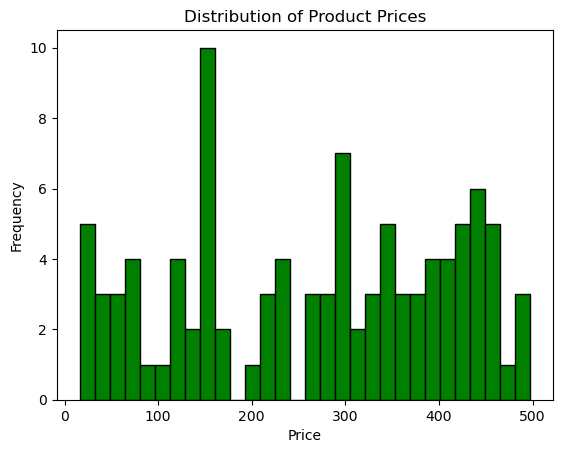

In [10]:
plt.hist(products['Price'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

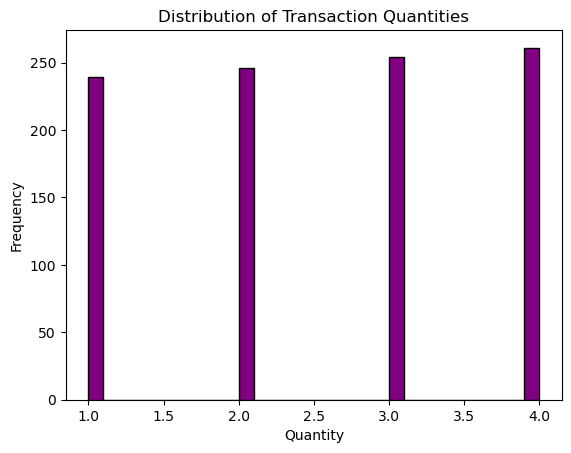

In [12]:
plt.hist(transactions['Quantity'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

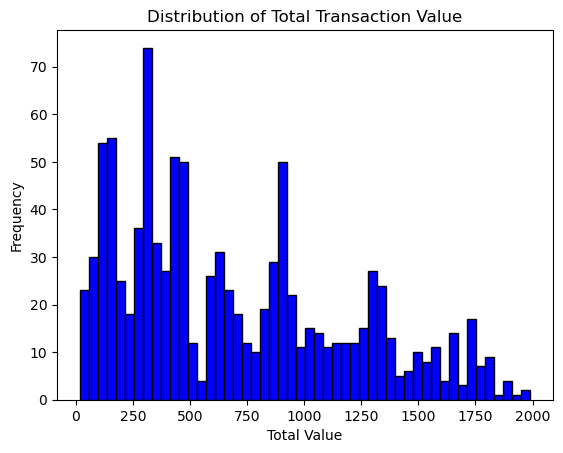

In [16]:
plt.hist(transactions['TotalValue'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

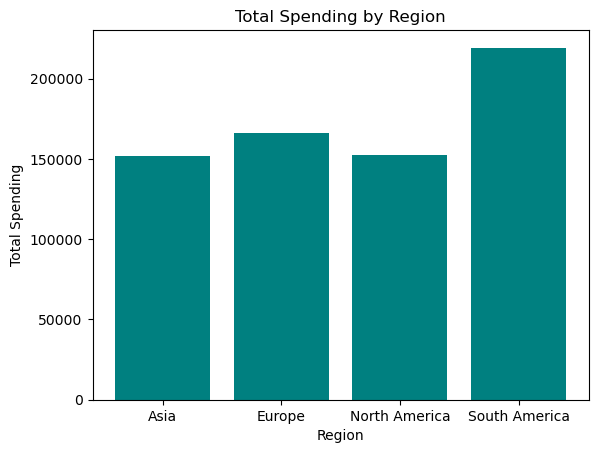

In [18]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
region_spending = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
plt.bar(region_spending['Region'], region_spending['TotalValue'], color='teal')
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.show()

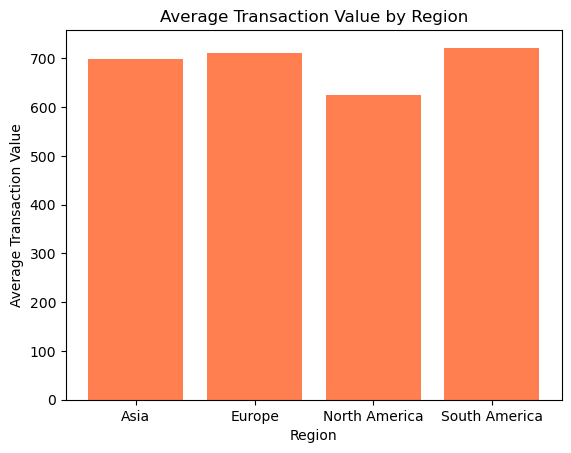

In [20]:
avg_spending = merged_data.groupby('Region')['TotalValue'].mean().reset_index()
plt.bar(avg_spending['Region'], avg_spending['TotalValue'], color='coral')
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value')
plt.show()

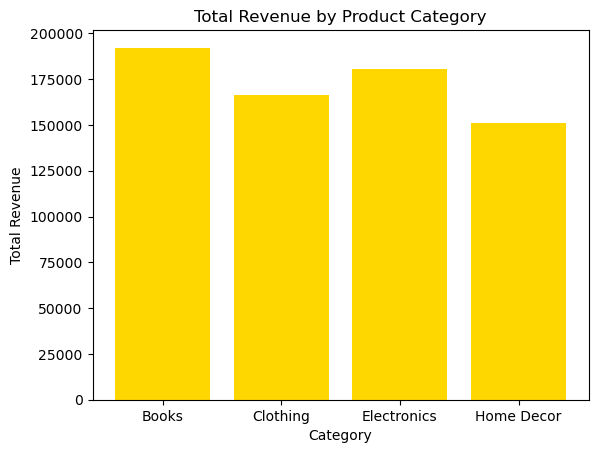

In [22]:
merged_data = pd.merge(transactions, products, on='ProductID')
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
plt.bar(category_revenue['Category'], category_revenue['TotalValue'], color='gold')
plt.title('Total Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

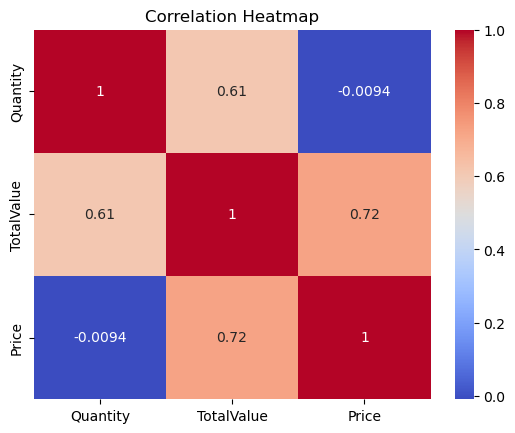

In [24]:
import seaborn as sns
numerical_data = transactions[['Quantity', 'TotalValue', 'Price']]
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

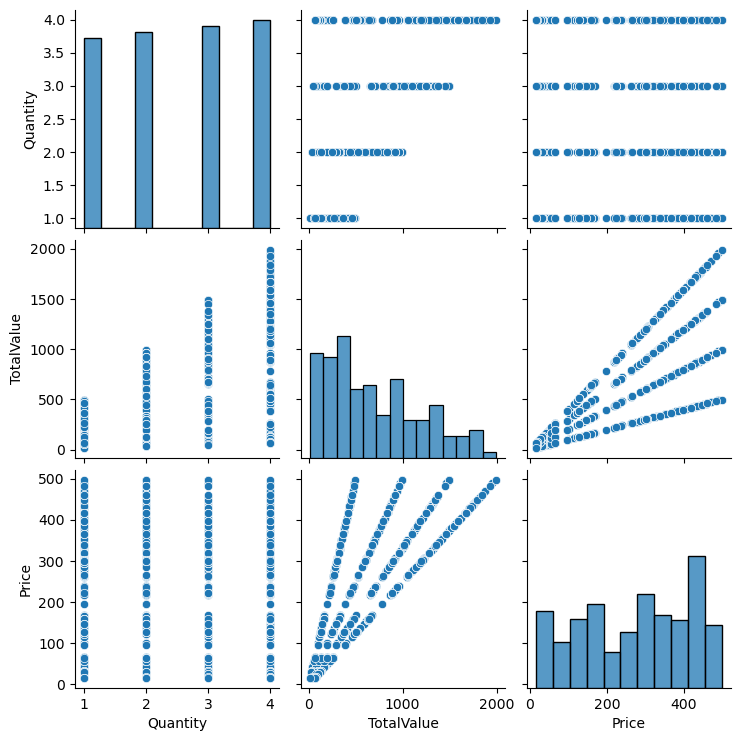

In [26]:
sns.pairplot(numerical_data)

plt.show()

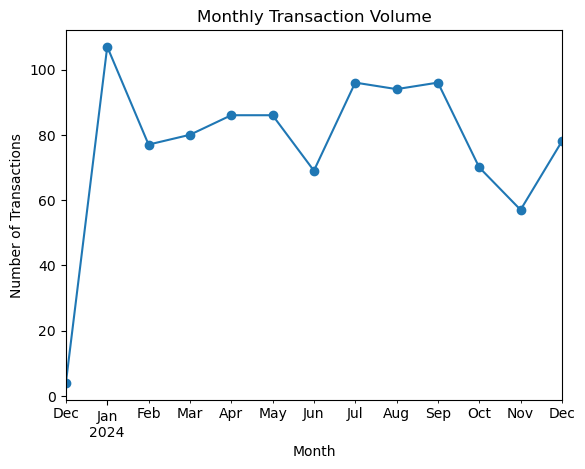

In [28]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions.groupby('TransactionMonth').size()
monthly_transactions.plot(kind='line', marker='o')
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

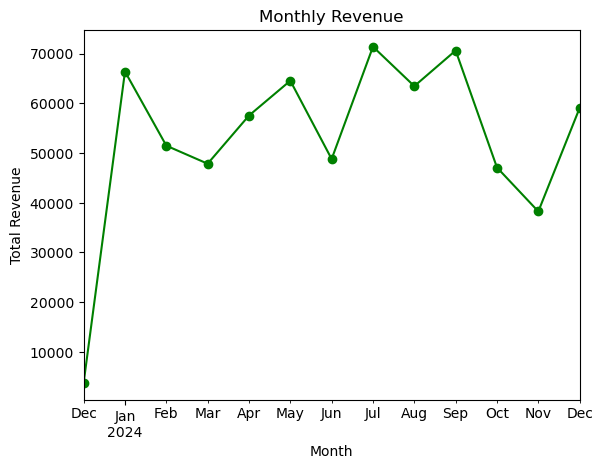

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'TransactionMonth', 'CustomerName',
       'Region', 'SignupDate', 'SignupYear'],
      dtype='object')
Customers Columns: Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'SignupYear'], dtype='object')
Transactions Columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'TransactionMonth'],
      dtype='object')


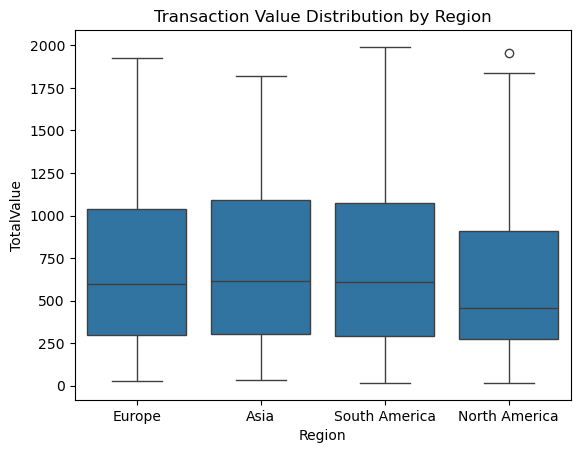

In [36]:
monthly_revenue = transactions.groupby('TransactionMonth')['TotalValue'].sum()
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()
merged_data = pd.merge(transactions, customers, on='CustomerID')
print(merged_data.columns)  # Check if 'Region' is in the columns

print("Customers Columns:", customers.columns)
print("Transactions Columns:", transactions.columns)

sns.boxplot(x='Region', y='TotalValue', data=merged_data)
plt.title('Transaction Value Distribution by Region')
plt.show()

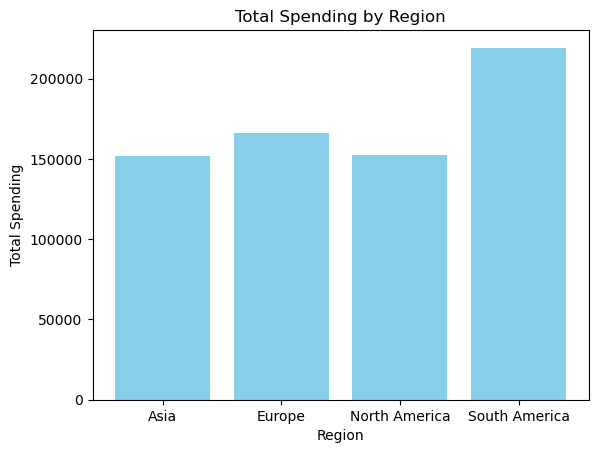

In [38]:
import matplotlib.pyplot as plt

region_spending = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
plt.bar(region_spending['Region'], region_spending['TotalValue'], color='skyblue')
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.show()
